### <b>NLP - Sentiment Classfication - <b style="color: blue">Bag of words</b></b>

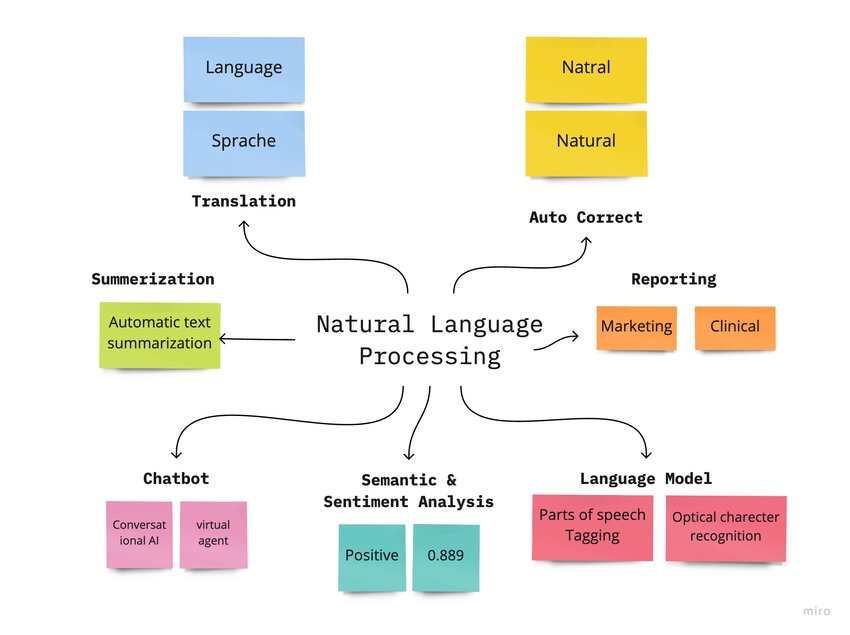
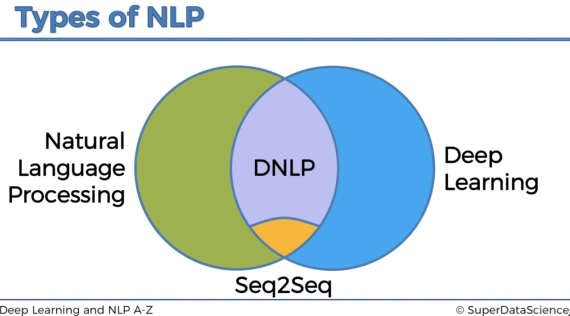
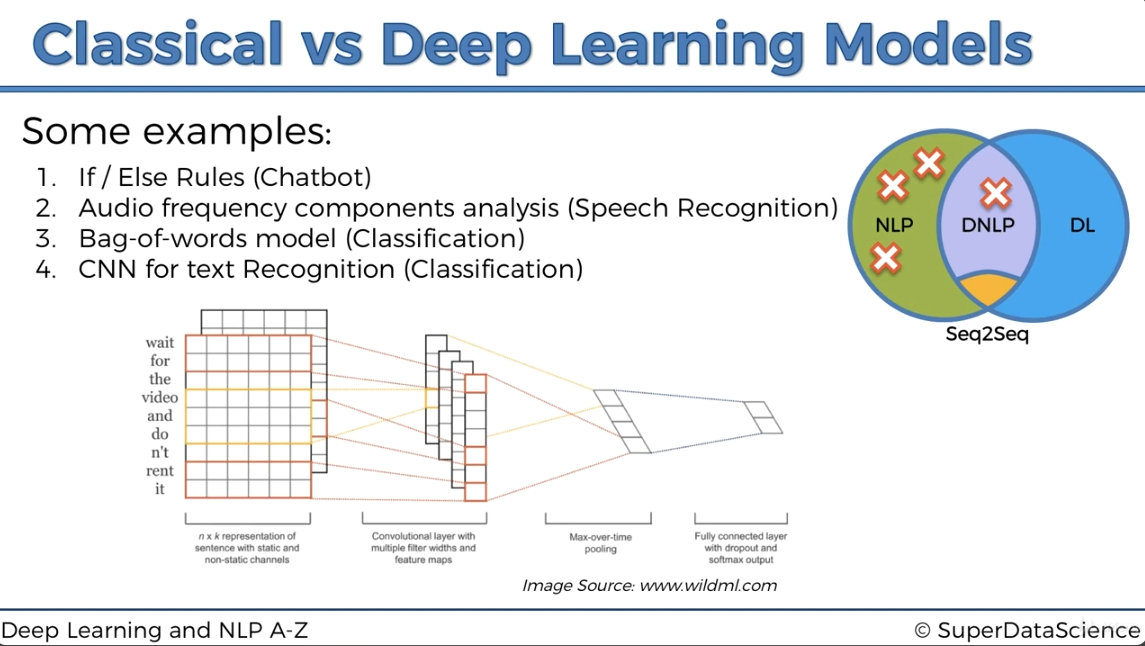
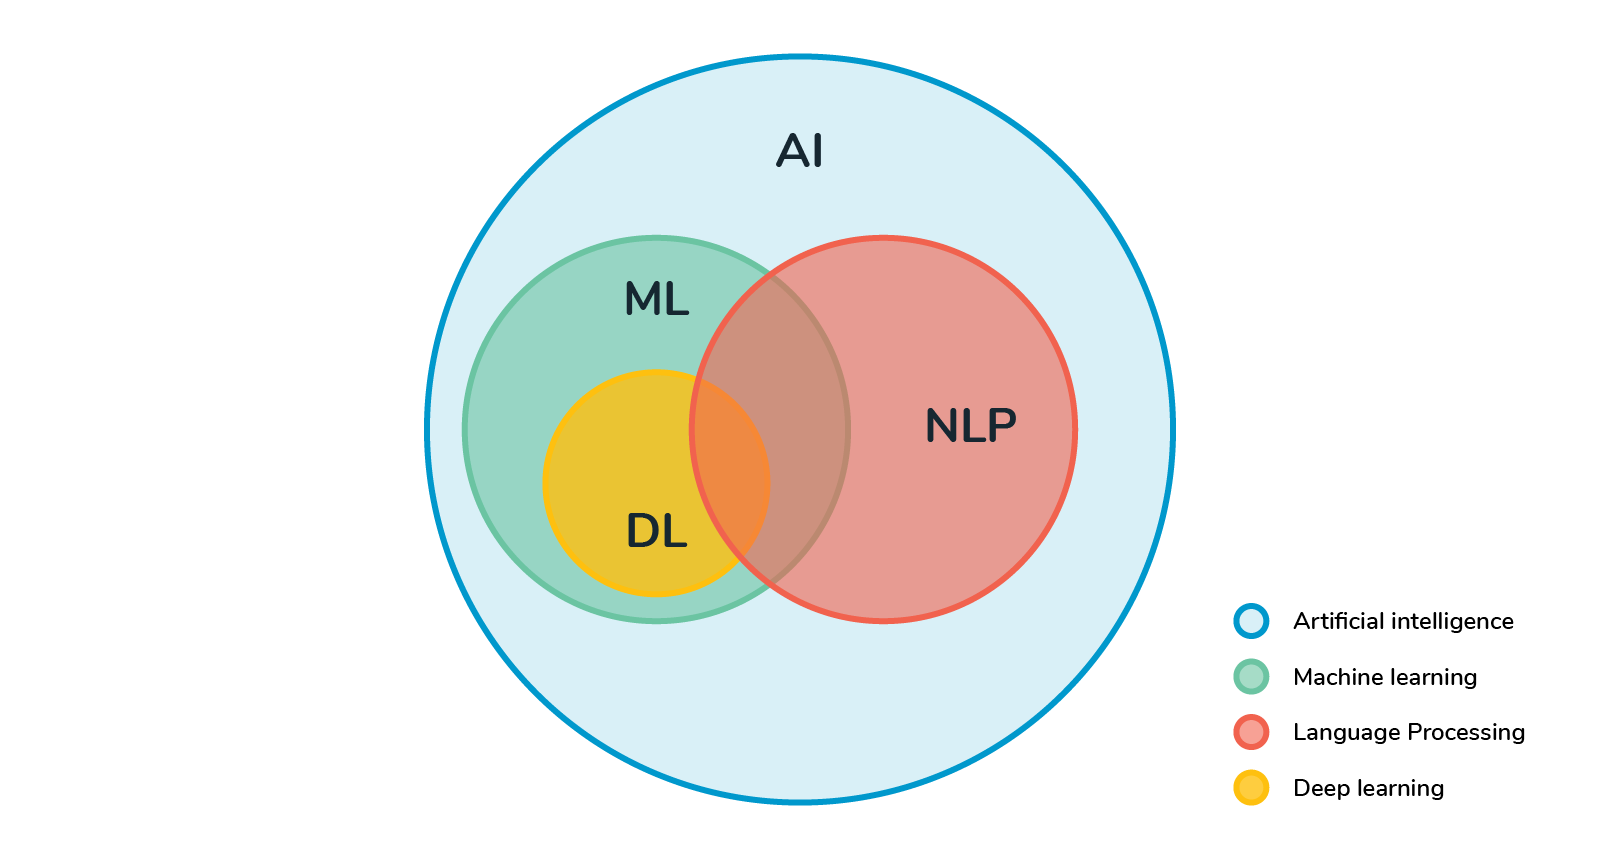
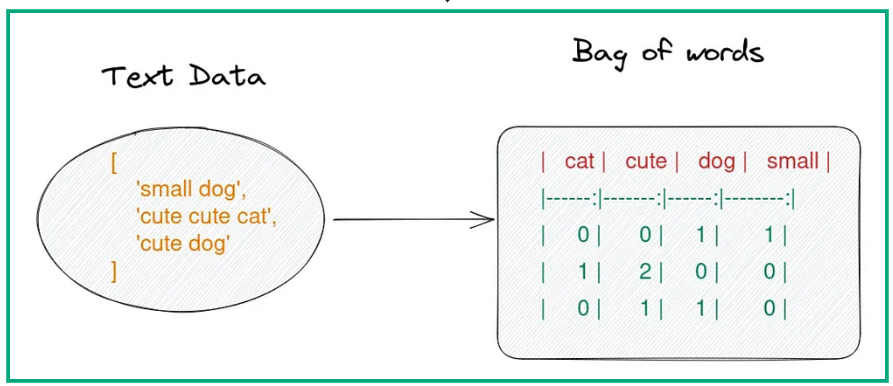
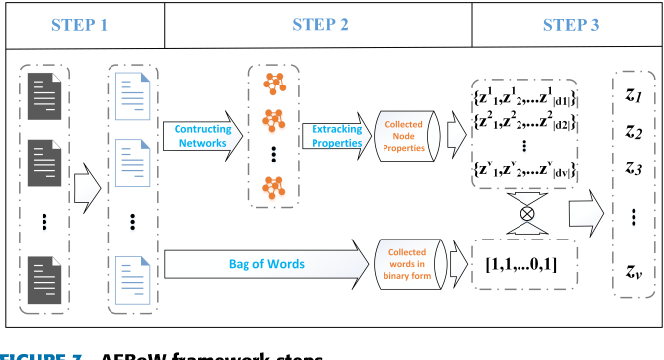
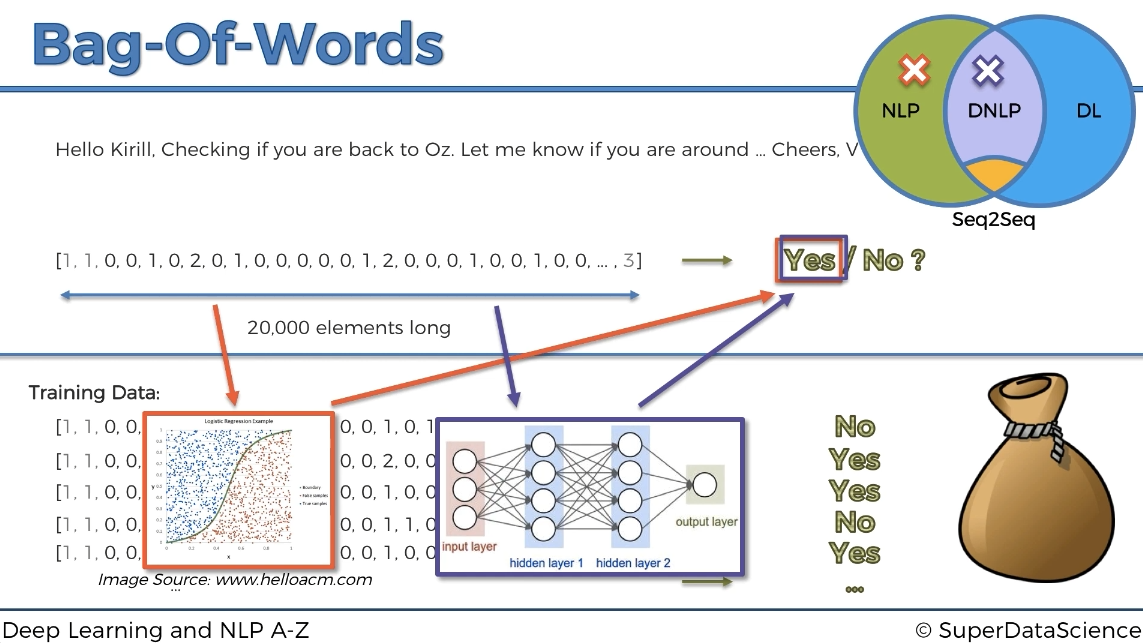

### <b>Loading/importing libraries</b>

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PanCh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### <b>Data preprocessing</b>

In [70]:
dataset = pd.read_csv("Restaurant_Reviews.tsv", delimiter = "\t", quoting = 3)

print(f"Dataset: \n{dataset}")

Dataset: 
                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


### <b>Cleaning the texts</b>

In [71]:
number_of_reviews = len(dataset)
corpus = []
for i in range(0, number_of_reviews):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)
print(f"Corpus: \n{corpus}\n")

Corpus: 
['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid 

### <b> Creating the Bag of Words model</b>

In [72]:
count_vectorizer = CountVectorizer(max_features = 1500)
X = count_vectorizer.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

print(f"Length of X: {len(X)}\n")
print(f"X: \n{X}\n")
print(f"y: \n{y}\n")

Length of X: 1000

X: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

y: 
[1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1
 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1
 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1
 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1
 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1
 1 1 0 1 1 0 1 0 0 0 1 1 1 

### <b>Splitting the dataset into training and test set</b>

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

print(f"X_train: \n{X_train}\n")

X_train: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



### <b>Training the Naive Bayes Classification model/classifier on the training set</b>

In [74]:
gaussian_naive_bayes_classifier = GaussianNB()
gaussian_naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

### <b>Predicting the Test set results</b>

In [75]:
y_pred = gaussian_naive_bayes_classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

### <b>Making the confusion matrix</b>

In [76]:
confusion_matrix_result = confusion_matrix(y_true = y_test, y_pred = y_pred)
accuracy_score_result = accuracy_score(y_true = y_test, y_pred = y_pred)

print(f"Confusion matrix: \n{confusion_matrix_result}\n")
print(f"Accuracy score: {accuracy_score_result}\n")

Confusion matrix: 
[[55 42]
 [12 91]]

Accuracy score: 0.73



### <b> Predicting if a single review is a positive or negative (classification)</b>

#### <b>Positive:</b>

In [81]:
new_review = "I love this restaurant so mouch."
new_review = re.sub('[^a-zA-z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
porter_stemmer = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [porter_stemmer.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = count_vectorizer.transform(new_corpus).toarray()
new_y_pred = gaussian_naive_bayes_classifier.predict(new_X_test)

print(f"Predicition: \n{new_y_pred}")

Predicition: 
[1]


#### <b>Negative:</b>

In [84]:
new_review = "I hate this restaurantt so much."
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
porter_stemmer = PorterStemmer()
all_stopwords = stopwords.words('English')
all_stopwords.remove('not')
new_review = [porter_stemmer.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = count_vectorizer.transform(new_corpus).toarray()
new_y_pred = gaussian_naive_bayes_classifier.predict(new_X_test)

print(f"Prediction: \n{new_y_pred}\n")

Prediction: 
[0]

